Epoch [1/100000], Loss: 8.5507
Epoch [101/100000], Loss: 1.4204
Epoch [201/100000], Loss: 1.0869
Epoch [301/100000], Loss: 1.0279
Epoch [401/100000], Loss: 1.0133
Epoch [501/100000], Loss: 1.0096
Epoch [601/100000], Loss: 1.0086
Epoch [701/100000], Loss: 1.0084
Epoch [801/100000], Loss: 1.0083
Epoch [901/100000], Loss: 1.0083
Epoch [1001/100000], Loss: 1.0083
Epoch [1101/100000], Loss: 1.0083
Early stopping at epoch 1191


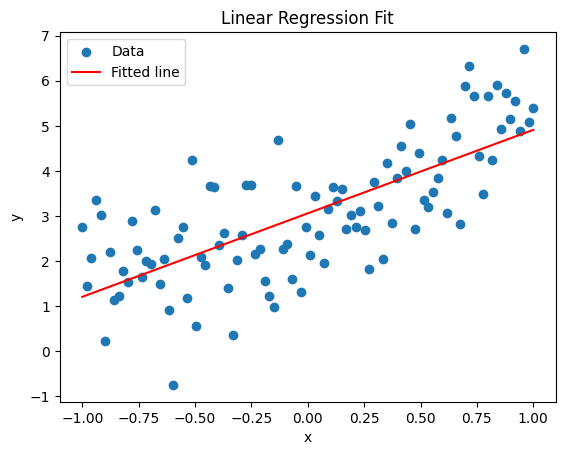

In [4]:
# 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可重复
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)

# 生成随机数据
def generate_data(n_samples=100, x_range=(-1, 1), noise_std=1):
    x = np.linspace(x_range[0], x_range[1], n_samples).reshape(-1, 1)
    noise = np.random.normal(0, noise_std, (n_samples, 1))
    y = 2 * x + 3 + noise
    return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# 定义线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# 训练模型
def train_model(model, x, y, learning_rate=0.01, num_epochs=1000, early_stopping_patience=50):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    best_loss = float('inf')
    no_improve_epochs = 0
    
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        
        if epoch % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
            
        # Early stopping
        if loss.item() < best_loss:
            best_loss = loss.item()
            no_improve_epochs = 0
        else:
            no_improve_epochs += 1
            if no_improve_epochs >= early_stopping_patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

# 绘制拟合曲线
def plot_results(x, y, model):
    model.eval()
    with torch.no_grad():
        predictions = model(x).numpy()
    plt.scatter(x.numpy(), y.numpy(), label='Data')
    plt.plot(x.numpy(), predictions, color='red', label='Fitted line')
    plt.title('Linear Regression Fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# 主函数
def main():
    set_seed(0)
    x, y = generate_data()
    model = LinearRegressionModel()
    train_model(model, x, y, learning_rate=0.01, num_epochs=100000)
    plot_results(x, y, model)

# 运行主函数
if __name__ == "__main__":
    main()